# Lenet-5 (1998)

CNN 아키텍쳐의 할아버지급의 위상을 가지는 Lenet-5 모델에 대해 알아보고자 한다. 이 모델이 소개된 논문의 주요 내용은 잘 설계된 신경망에 대한 효율성에 대한 입증과 Graph Transformer Network으로 Lenet은 하나의 성공적인 예시로 어찌보면 조연처럼 나오지만, 그래도 우리가 관심있는 것은 Lenet모델이니 이 글에서는 Lenet에만 집중하록 하겠다.

> 논문 : [GradientBased Learning Applied to Document Recognition [1998]](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

## Ⅰ. Introduction

better pattern recognition system can be built by relying more on automatic learning and less on hand-designed heuristics.

<img src='img/Lenet/traditional_pattern_recognition.png' />

당시 패턴 인식 문제에서 가장 보편적인 방법은 사람이 직접 설계한 모듈을 통해 Feature vector를 추출하여 이를 입력으로 분류기를 훈련시키는 방식이였다.
이러한 방식에는 크게 두가지의 문제점이 있었는데,  
1. 모듈 설계 자체의 어려움과,
2. 다른 task마다 매번 새로운 모듈을 설계해야 한다는 점이다.
이러한 문제점에도 불구하고 이러한 방식을 썼던 이유는 분류기가 낮은 차원의 입력값에서만 성능을 보였기 때문이다.

하지만 다음과 같은 3가지의 변화로 상황이 바뀌었따
1. 컴퓨터의 계산 성능의 향상
2. 더 많은 수의 데이터를 사용할 수 있게 되었다.
3. 머신러닝 기법들의 발전

## Ⅱ. Convolution Neural Network

feature extractor에 neural network를 사용하지 않았던 이유? Linear Layer의 경우 이미지의 input이 몇백에 달하기 때문에 매우 많은 수의 parameter가 필요하다. 이런 많은 parameter를 잘 학습시키기 위해서는 더 큰 training dataset이 필요하다. 또한 하드웨어의 메모리 용량에 제한에 걸릴 수도 있다.

딥러닝 입문자라면 한번씩 써보게 되는 MNIST 데이터셋에 CNN 구조를 성공적으로 접목시킨 첫 모델이다. input data에서 사람이 직접 feature를 추출하여 모델에 넣기보다 raw 한 데이터를 넣었다. data에 대한 최소한의 지식이 있는 신경망을 사용해야 한다. 가장 중요한 문제점은 input의 translation이나 distortion에 취약할 수 있다는 점ㅁ이다.(학습이 될지언정 오래 걸릴 것이다) convolution network는 이러한 취약점을 태생적으로 극복할 수 있게 설계되었다.  
두번째로 linear layer는 input의 위상적 특성을 완전히 무시한다. CNN은 receptive field에서만 connection 가지게 강제시킨다.


Fully Connected Layer의 문제점 : parmeter가 너무 많다. - Generalize가 잘 안된다.
CNN의 경우: local connection만 갖게 제한함, shared weight를 가짐 => feature map을 여러개 생성

<img src="img/Lenet/convolution.png" width=50% />

Convolution Layer는 shift, scale, distortion에 내성을 갖기 위해 크게 3가지의 발상에서 설계되었다.
1. local receptive field
2. shared weights
3. sub-sampling
이러한 개념을 적용하면 input의 모든 receptive field에 shared weight를 적용한 연산을 하면 feature map을 얻을 수 있다. 완전한 convolution layer는 각기 다른 weight로 여러 feature map을 추출한다.
위의 예시에서 feature map의 하나의 unit은 input의 5x5 receptive field에서 25개의 weight(그리고 1개의 bias)로 얻은 연산의 결과인 것이다. 이를 한칸씩 이동시키면서 전체 feature map을 얻을 수 있다.(이 과정에서 전 영역과 겹치는 구간이 생긴다). 모든 영역에서 같은 weightd와 bias 사용하므로 모든 영역에서 같은 특징을 추출한다. 다른 weight를 사용하여 다른 특징을 담은 feature map을 생성한다.

한번 특징을 추출하게 되면 그 위치적 정보의 중요성은 떨어진다. 예를 들어 왼쪽 위에서 꼭지점을 특징이 발견되었으면 0이 아닐것이라고 추측할 수 있다. 그 꼭지점의 정확한 위치는 크게 중요하지 않다.(오히려 해가 될 수 있다. 같은 숫자에서도 다르므로). feature map의 정보를 떨어트리는 방법으로 해상도를 낮추는 것이 있고 이는 sub-sampling layer로 이러한 목적을 달성할 수 있다. 이 layer는 영역의 모든 값들의 평균값을 구하여 weight를 곱하고 bias를 더한다음에 sigmoid function을 통과한다.(현재의 자주 쓰이는 parameter가 없는 pooling layer랑 다르다). 해상도를 낮추는 것이 목표이기 때문에 convolution layer와 달리 영역간 overlap이 일어나지 않고 결과적으로 너비와 높이가 1/2이 된다(2x2커널일시).
통상적으로 전체 신경망은 convolution layer와 subsampling layer를 하나씩 반복하면서 이루어진다. 이러한 망을 통과하면서 spatial resolution이 낮은 많은 feature를 얻을 수 있다.


## Ⅲ. Lenet-5

<img src='img/Lenet/lenet.png' />

Lenet-5는 총 7개의 trainable한 parameter를 가진 layer로 구성되어 있다.

### 1. input

32x32의 크기로 이는 원본데이터의 크기인 28x28보다 살짝 큰데 그 이유는 항상 특징이 최대한 receptive field 중앙에 놓여있기 바라기 때문에 그렇다고 한다. 평균값이 0, 표준편차가 1이 되도록 normalize를 하였다. (대략 바탕이 -0.1, 글씨가 1.175 의 값을 갖는다)

### 2. C1

5x5 커널를 사용하여 6개의 28x28의 feature map을 가지는 convolution layer이다. parameter 수= (5x5 + 1) x 6 = 156

### 3. S1
2x2 커널을 사용하여 6개의 28x28 feature map을 14x14로 축소시킨다. parameter 수= (1+1) x 6 = 12

### 4. C3

기본적으로 C1(우리가 흔히 사용하는 Convolution)과 같지만 6개의 채널을 모두 사용하지 않고 subset만을 사용하여 feature map을 생성한다.
16개의 feature map에 대해서 사용하는 input channel은 밑의 표에서 확인할 수 있다.

<img src='img/Lenet/c3.png' />

왜 모든 channel를 사용하지 않는가라는 의문이 생길 수 있다. 논문에서는 그 이유로 2가지를 설명하는데
1. 첫째로, connection의 수와 parameter의 수를 줄일 수 있다.
2. 망의 대칭성을 무너트릴 수 있다. 이로써 생성되는 각 feature map이 최대한 다른 특징을 갖도록 유도할 수 있다.

parameter 수 = (5*5*3+ 1)*6 + (5*5*4+1)*9 + (5*5*6+1)*1 = 1516

### 5. S4

C3의 feature map의 높이와 너비를 절반으로 줄인다

### 6. C5

S4에서 나온 feature map의 크기가 5x5이기 때문에 5x5 convolution을 하게 되면 1x1 feature map이 나온다. 따라서 이 연산은 Fully connected layer와 다름이 없다.

parameter 수 = (5*5*16 + 1) *120 = 48120

### 7. F6

86개의 output을 가지는 linear layer

parameter 수 = (120 + 1) x 84 = 10164


### 8. Output



###  Squashing Function

y = Atanh(Sx) A = 1.7159

In [235]:
121*84

10164

In [234]:
(5*5*16 + 1) *120

48120

## Preprocessing

16x16 centered in 28x28 -1~1 1channel grayscaled image
output = 10 sized vector +1 for correct and -1 for others

## Network

전형적인 Conv1-Pool1-Conv2-Pool2-Linear 구조이다.
Convolution layer 의 경우 5*5 stride 1이며
Average Pooling layer 의 경우 2*2 stride 2를 사용한다. 논문 내용을 보면 Pooling Layer에도 weight 1개 bias 1개의 파라미터가 있다고 한다.
Conv2 의 같은 경우 feature map을 생성할 때 모든 channel을 사용하지 않고 지정된 channel들만 선택적으로 사용하여 feature map을 얻는데 그 내용은 다음과 같다

<img src='img/Lenet/connection.png' />

총 12개의 feature map을 얻는데 첫번째는 1번째 채널만 사용하고 두번째 feature map은 1번째와 2번쨰 채널에 커널을 적용하여 얻는 그런 식이다. 이러한 짓을 하는 이유를 2가지르 들었는데 하나는 parameter 수를 줄일 수 있다는 장점이 있고 두번째는 대칭성을 깨기 위해서, 즉 최대한 feauture map들이 서로 다른 특징을 담도록 유도하였다는 이유이다.

In [1]:
from torchvision.datasets import MNIST

In [2]:
from torchvision.transforms import Compose, ToTensor, Lambda, Pad


In [8]:
import numpy as np

In [3]:
transform = Compose([
    ToTensor(),
    Lambda(lambda tensor: 2 * tensor - 1)])

In [218]:
train_dataset = MNIST(root='~/git/cnn/data/', train=True, transform=transform)
test_dataset = MNIST(root='~/git/cnn/data/', train=False, transform=transform)

In [5]:
import matplotlib.pyplot as plt

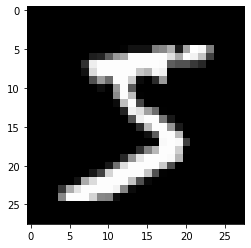

In [11]:
sample_img = train_dataset[0][0].squeeze(0)
sample_img.shape
plt.imshow(sample_img, cmap='gray')
plt.show()

In [131]:
from torch.utils.data import DataLoader, Subset

In [132]:
7291+2549

9840

In [133]:
2707

2707

In [140]:
217-200

17

In [139]:
257-217

40

In [219]:
train_dataset = Subset(train_dataset, torch.randperm(len(train_dataset))[:9840])
test_dataset = Subset(test_dataset, torch.randperm(len(train_dataset))[:2707])

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [55]:
import torch.nn as nn

In [183]:
class PartialConv2d(nn.Module):
    
    def __init__(self):
        super(PartialConv2d, self).__init__()
        self.subsets = [[0], [0,1], [0,1], [1], [0,1], [0,1],
                        [2], [2,3], [2,3], [3], [2,3], [2,3]]
        self.convs = nn.ModuleList([nn.Conv2d(len(subset), 1, 5) for subset in self.subsets])
    
    def forward(self, x):
        feature_maps = []
        for conv, subset in zip(self.convs, self.subsets):
            inp = x[:, subset]
            feature_maps.append(conv(inp))
        return torch.cat(feature_maps, dim=1)

In [208]:
class AvgPool(nn.Module):
    
    def __init__(self, input_channel, kernel_size):
        super(AvgPool, self).__init__()
        self.avgpool = nn.AvgPool2d(kernel_size)
        self.weight = torch.nn.Parameter(torch.ones(input_channel, 1, 1, dtype=torch.float32))
        self.bias = torch.nn.Parameter(torch.zeros(input_channel, 1, 1, dtype=torch.float32))
    
    def forward(self, x):
        return self.weight * self.avgpool(x) + self.bias

In [236]:
class Lenet1(nn.Module):
    
    def __init__(self):
        super(Lenet1, self).__init__()
        A = 1.7159
        self.net = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=5),
            nn.Tanh(),
            AvgPool(4, 2),
            nn.Tanh(),
            PartialConv2d(),
            nn.Tanh(),
            AvgPool(12, 2),
            nn.Tanh(),
            nn.Flatten(),
            nn.Linear(4*4*12, 10),
            nn.Tanh()
        )

    def forward(self,x):
        return self.net(x)

In [225]:
total_parameters = 0
for i, param in lenet1.named_parameters():
    total_parameters += param.numel()
    
total_parameters 

2578

In [214]:
from torchinfo import summary

summary(lenet1, (1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Lenet1                                   --                        --
├─Sequential: 1                          --                        --
│    └─PartialConv2d: 2                  --                        --
│    │    └─ModuleList: 3-1              --                        512
├─Sequential: 1-1                        [1, 10]                   --
│    └─Conv2d: 2-1                       [1, 4, 24, 24]            104
│    └─AvgPool: 2-2                      [1, 4, 12, 12]            --
│    │    └─AvgPool2d: 3-2               [1, 4, 12, 12]            --
│    └─Tanh: 2-3                         [1, 4, 12, 12]            --
│    └─PartialConv2d: 2-4                [1, 12, 8, 8]             --
│    └─AvgPool: 2-5                      [1, 12, 4, 4]             --
│    │    └─AvgPool2d: 3-3               [1, 12, 4, 4]             --
│    └─Tanh: 2-6                         [1, 12, 4, 4]             --
│    └─Flatte

In [237]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 50

lenet1 = Lenet1().to(device)
optimizer = torch.optim.SGD(lenet1.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15], gamma=0.2)
loss_fn = nn.MSELoss()

for epoch in range(1, epochs+1):
    loss_tot, acc = 0, 0
    for X, label in train_dataloader:
        X, label = X.to(device), label.to(device)
        pred_y = lenet1(X)
        y = torch.full((len(label), 10), -1, dtype=torch.float32, device=device)
        y.scatter_(1, label.unsqueeze(1), 1)
        loss = loss_fn(pred_y, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_tot += loss.item()
        pred_label = (pred_y).argmax(dim=1)
        acc += (pred_label == label).sum().item() / len(label)
    #scheduler.step()
    loss_test, acc_test =  0, 0
    with torch.no_grad():
        for X, label in test_dataloader:
            X, label = X.to(device), label.to(device)
            pred_y = lenet1(X)
            y = torch.full((len(label), 10), -1, dtype=torch.float32, device=device)
            y.scatter_(1, label.unsqueeze(1), 1)
            loss = loss_fn(pred_y, y)
            loss_test += loss.item()
            pred_label = (pred_y).argmax(dim=1)
            acc_test += (pred_label == label).sum().item() / len(label)
    
    print(f'epoch:{epoch}')
    print(f'  Train metrics : loss:{loss_tot/len(train_dataloader):.4f}, acc:{acc/len(train_dataloader):.4f}')
    print(f'  Test  metrics : loss:{loss_test/len(test_dataloader):.4f}, acc:{acc_test/len(test_dataloader):.4f}\n')

TypeError: unsupported operand type(s) for *: 'float' and 'Tanh'